In [1]:
cd ..

/home/janek/mag/reasonable-embeddings


In [2]:
import numpy as np
import pandas as pd
import torch as T
import torch.nn.functional as F
import torch.nn as nn
from sklearn import metrics
from sklearn.decomposition import PCA
from tqdm import tqdm

from src.reasoner_mod import *
from src.simplefact import *
from src.simplefact.syntax import *
from src.reasoner import *
from src.generate import *
from src.utils import *
from src.vis import *
import random
seed = 2022
ts = timestr()

In [3]:
ontos, data_tr, data_vl, data_te = load_test_dataset('local/out/dataset/dataExp6-9.json')
idx_te, X_te, y_te = data_te[0], data_te[1], data_te[2]

In [4]:

emb_size = 10
embs_params = dict(emb_size=emb_size)
head_params = dict(emb_size=emb_size, hidden_size=16)
train_params = dict(epoch_count=10, batch_size=32)


T.manual_seed(seed)
transfer_r_embs = EmbeddingLayer.from_ontos(ontos, emb_size=emb_size)
transfer_r_head = ModifiedReasonerHead(**head_params)
transfer_r_head.load_state_dict(T.load('local/out/exp/20240808T184236/reasonerM.pt'))

print('----')

print('frozen reasoner head (modified)')
T.manual_seed(seed)
random.seed(seed)
transfer_log = train_mod(data_tr, data_vl, transfer_r_head, transfer_r_embs, freeze_reasoner=True, run_name='frozen transfer modified', **train_params)


----
frozen reasoner head (modified)
train epoch 00/10 | batch 2626/2625 | loss 1.5201 | val loss 1.6700 | acc 0.6025 | f1 0.3239 | prec 0.2200 | recall 0.6141 | roc auc 0.6555 | pr auc 0.2925 | elapsed 40.24s
train epoch 01/10 | batch 2626/2625 | loss 0.9253 | val loss 0.6272 | acc 0.8023 | f1 0.5018 | prec 0.4119 | recall 0.6421 | roc auc 0.8145 | pr auc 0.5292 | elapsed 128.09s
train epoch 02/10 | batch 2626/2625 | loss 0.4400 | val loss 0.4151 | acc 0.8614 | f1 0.5931 | prec 0.5445 | recall 0.6514 | roc auc 0.8744 | pr auc 0.6455 | elapsed 125.55s
train epoch 03/10 | batch 2626/2625 | loss 0.3020 | val loss 0.3412 | acc 0.8833 | f1 0.6402 | prec 0.6132 | recall 0.6697 | roc auc 0.9019 | pr auc 0.7067 | elapsed 152.81s
train epoch 04/10 | batch 2626/2625 | loss 0.2380 | val loss 0.3037 | acc 0.8942 | f1 0.6661 | prec 0.6524 | recall 0.6804 | roc auc 0.9169 | pr auc 0.7426 | elapsed 151.16s
train epoch 05/10 | batch 2626/2625 | loss 0.1987 | val loss 0.2811 | acc 0.9009 | f1 0.6854 |

In [5]:
ts = timestr()

emb_size = 10
embs_params = dict(emb_size=emb_size)
head_params = dict(emb_size=emb_size, hidden_size=16)
train_params = dict(epoch_count=10, batch_size=32)

T.manual_seed(seed)
transfer_r_orig_embs = EmbeddingLayer.from_ontos(ontos, emb_size=emb_size)
transfer_r_orig_head = ReasonerHead(**head_params)
transfer_r_orig_head.load_state_dict(T.load('local/out/exp/20240808T184236/reasonerO.pt'))


print('frozen reasoner head (original)')
T.manual_seed(seed)
transfer_log_orig = train(data_tr, data_vl, transfer_r_orig_head, transfer_r_orig_embs, freeze_reasoner=True, run_name='frozen transfer original', **train_params)


frozen reasoner head (original)
train epoch 00/10 | batch 2626/2625 | loss 1.3831 | val loss 1.3738 | acc 0.6541 | f1 0.3541 | prec 0.2492 | recall 0.6116 | roc auc 0.6933 | pr auc 0.3442 | elapsed 41.23s
train epoch 01/10 | batch 2626/2625 | loss 0.7608 | val loss 0.4603 | acc 0.8520 | f1 0.5691 | prec 0.5187 | recall 0.6302 | roc auc 0.8524 | pr auc 0.6007 | elapsed 158.03s
train epoch 02/10 | batch 2626/2625 | loss 0.3510 | val loss 0.3375 | acc 0.8902 | f1 0.6445 | prec 0.6473 | recall 0.6417 | roc auc 0.8950 | pr auc 0.7011 | elapsed 154.57s
train epoch 03/10 | batch 2626/2625 | loss 0.2551 | val loss 0.2967 | acc 0.9025 | f1 0.6780 | prec 0.6947 | recall 0.6621 | roc auc 0.9126 | pr auc 0.7449 | elapsed 165.18s
train epoch 04/10 | batch 2626/2625 | loss 0.2120 | val loss 0.2761 | acc 0.9078 | f1 0.6927 | prec 0.7170 | recall 0.6700 | roc auc 0.9227 | pr auc 0.7682 | elapsed 165.46s
train epoch 05/10 | batch 2626/2625 | loss 0.1863 | val loss 0.2634 | acc 0.9111 | f1 0.7026 | prec

local/out/exp/20240810T222950
------
Frozen pre-trained reasoner head original
train time 1665.8939020633698
           mean     std   micro
acc      0.9224  0.0636  0.9224
prec     0.8260  0.1220  0.7807
recall   0.6725  0.0567  0.7061
f1       0.7373  0.0618  0.7415
auc_roc  0.9142  0.0244  0.9418
auc_pr   0.7792  0.0691  0.8189
------
Frozen pre-trained reasoner head modified
train time 1449.014154434204
           mean     std   micro
acc      0.9207  0.0663  0.9207
prec     0.7692  0.1041  0.7551
recall   0.7022  0.0653  0.7354
f1       0.7322  0.0752  0.7451
auc_roc  0.9214  0.0375  0.9476
auc_pr   0.7905  0.0852  0.8269


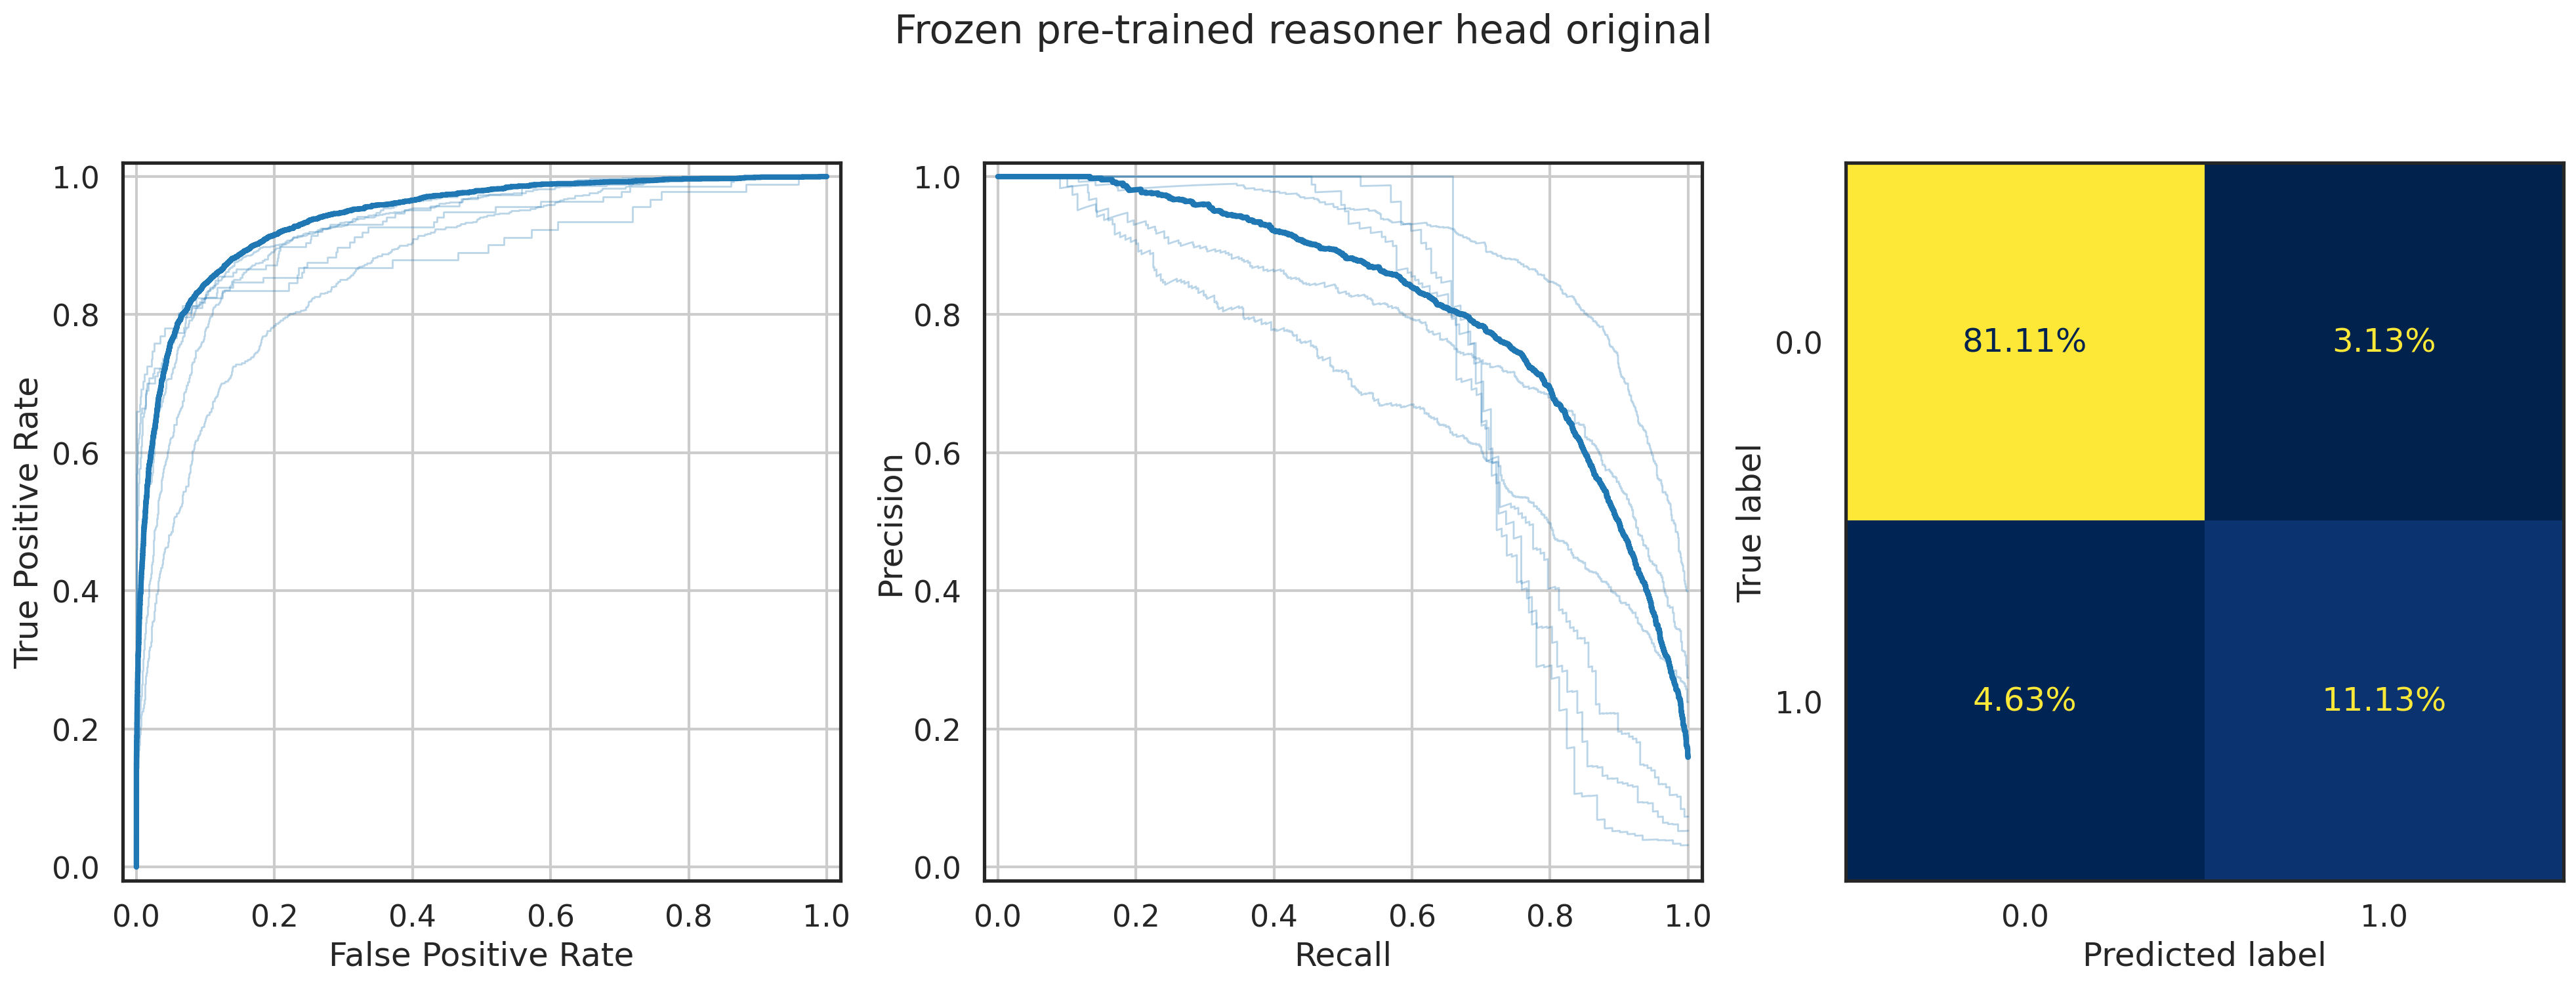

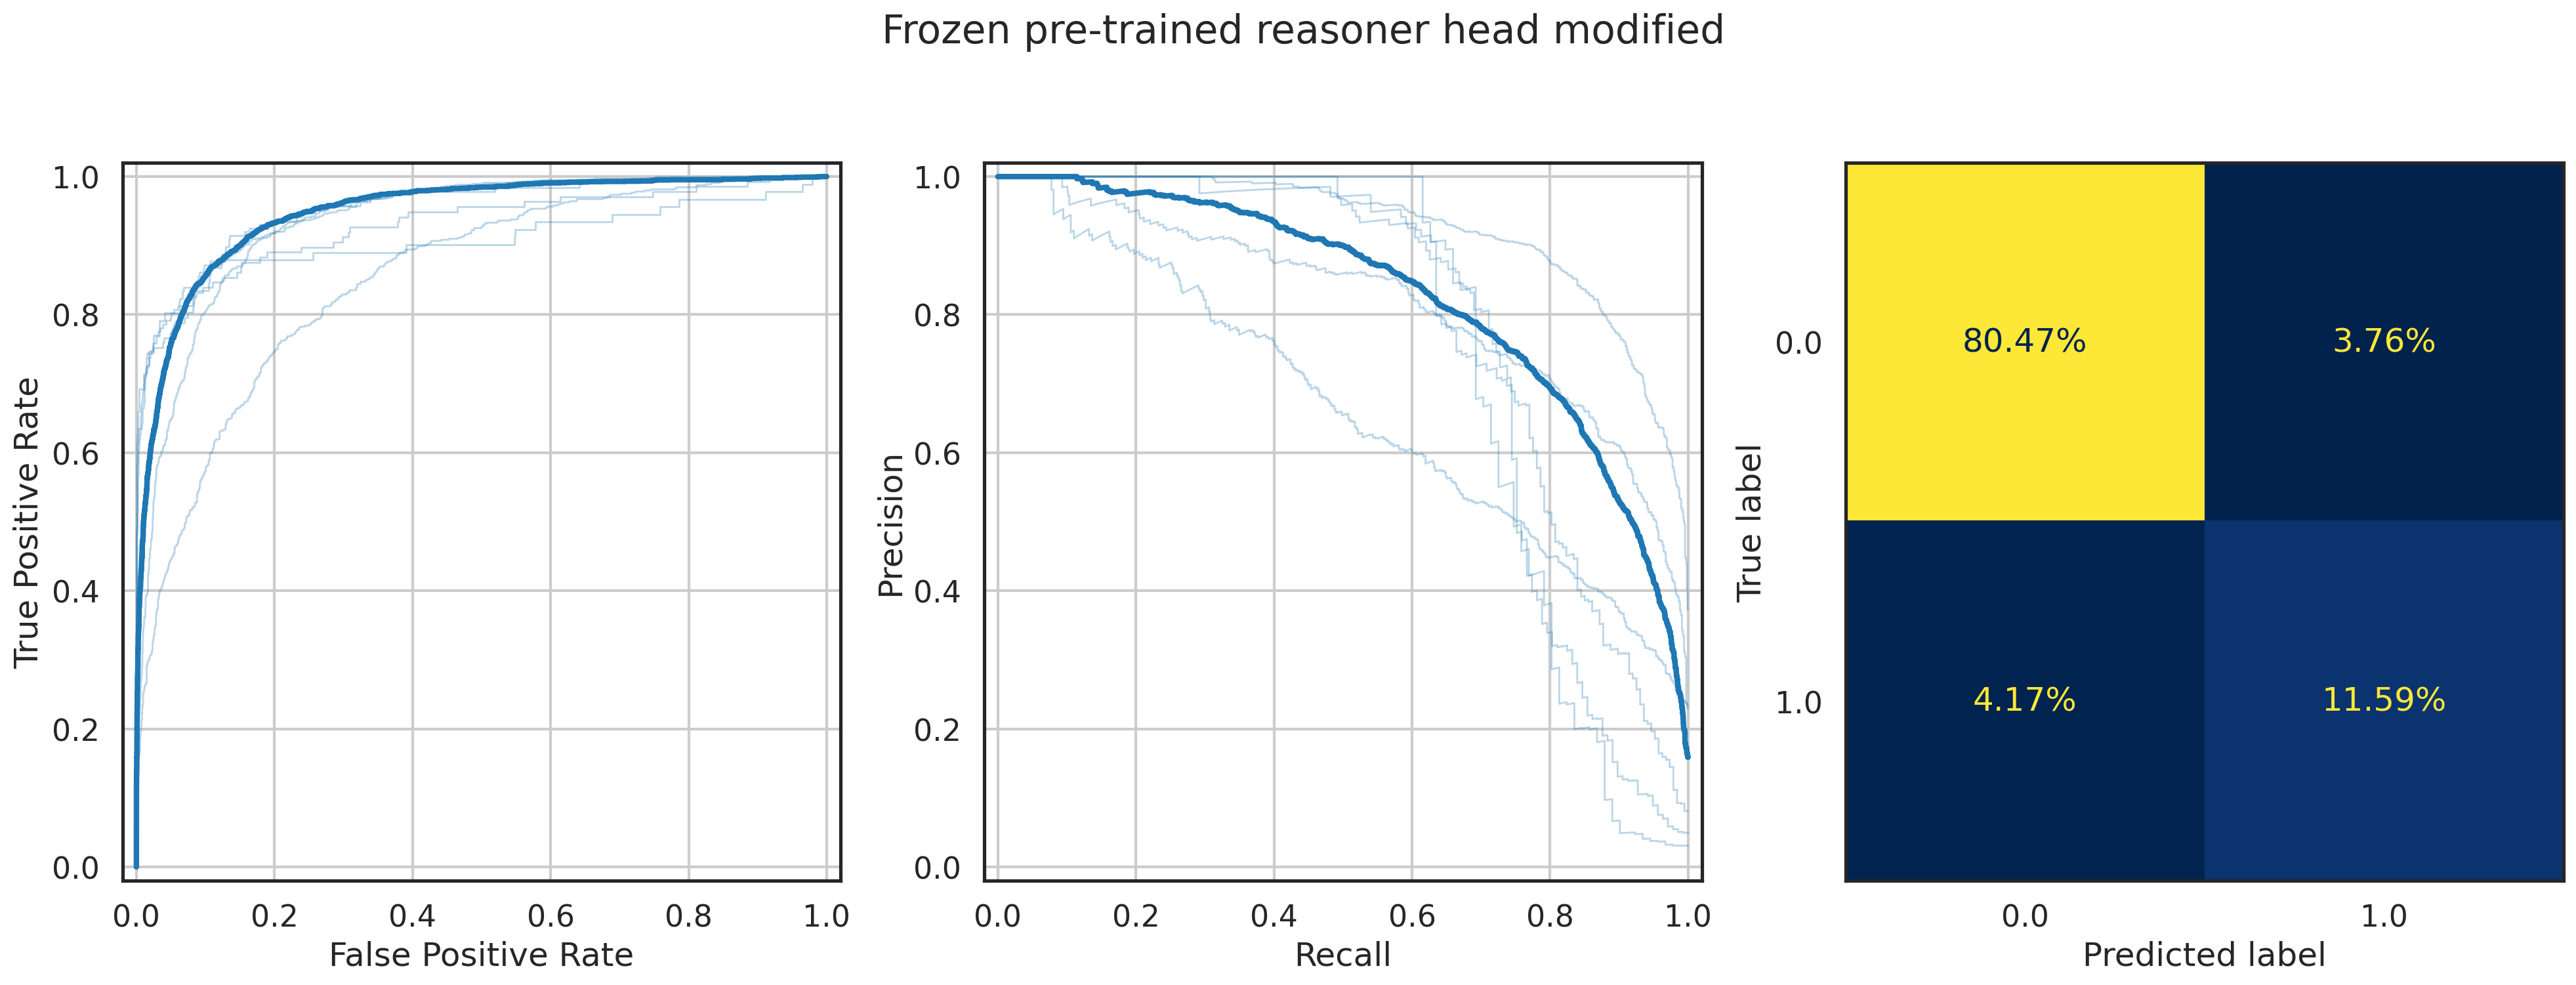

In [6]:
titles = 'Frozen pre-trained reasoner head original', 'Frozen pre-trained reasoner head modified'
logs = transfer_log_orig, transfer_log
heads = transfer_r_orig_head, transfer_r_head
embeddings = transfer_r_orig_embs, transfer_r_embs

base = 'local/out/exp/' + ts
mkdirp(base)
print(base)

for head, embs, log, title in zip(heads, embeddings, logs, titles):
    print('------')
    with T.no_grad():
        head.eval()
        if title == 'Frozen pre-trained reasoner head original':
            _, _, Y_te = eval_batch(head, embs, X_te, y_te, idx_te)
        else:
            _, _, Y_te = eval_batch_mod(head, embs, X_te, y_te, idx_te)

    print(title)
    
    history_tr = pd.DataFrame(log.history_tr)
    test_history_by_onto = pd.DataFrame(log.history_vl_by_onto)
    test_history = pd.DataFrame(log.history_vl)
    test_results = pd.DataFrame(dict(idx_te=idx_te, y_te=y_te, Y_te=Y_te))
    test_history.to_csv(base+f'/{title} test.csv', index=False)
    test_history_by_onto.to_csv(base+f'/{title} test by onto.csv', index=False)
    test_results.to_csv(base+f'/{title} test clas.csv', index=False)

    print('train time', history_tr.groupby('epoch').max().elapsed.sum())
    print(report(ontos, y_te, Y_te, idx_te).round(4))
    plt.suptitle(title)

In [7]:
onto_names = 'wildlife demacare stuff swo ontodt pizza'.split()

for head, embs, log, title in zip(heads, embeddings, logs, titles):
    df = pd.DataFrame(log.history_vl_by_onto)
    df = df[df.epoch == df.epoch.max()].drop(columns=['epoch', 'run', 'elapsed'])
    df.onto = df.onto.map(onto_names.__getitem__)
    print('-'*10)
    print(title)
    #print(df.agg(['mean', 'std']).round(4).T)
    print(df.round(4))

----------
Frozen pre-trained reasoner head original
       acc      f1    prec  recall  roc_auc  pr_auc      onto
60  0.9660  0.6946  0.8112  0.6073   0.9363  0.7618  wildlife
61  0.9857  0.7485  0.9143  0.6337   0.9090  0.7303  demacare
62  0.8810  0.7326  0.7629  0.7046   0.9293  0.8015     stuff
63  0.8347  0.6038  0.5824  0.6269   0.8668  0.6821       swo
64  0.9803  0.7552  0.8922  0.6547   0.9386  0.7741    ontodt
65  0.8607  0.7957  0.8281  0.7658   0.9208  0.8904     pizza
----------
Frozen pre-trained reasoner head modified
       acc      f1    prec  recall  roc_auc  pr_auc      onto
60  0.9687  0.7389  0.7870  0.6963   0.9375  0.7984  wildlife
61  0.9837  0.7232  0.8421  0.6337   0.9108  0.7234  demacare
62  0.8763  0.7314  0.7351  0.7277   0.9335  0.8145     stuff
63  0.8190  0.5858  0.5424  0.6368   0.8488  0.6521       swo
64  0.9803  0.7649  0.8571  0.6906   0.9469  0.8070    ontodt
65  0.8777  0.8228  0.8452  0.8015   0.9398  0.9124     pizza


In [8]:
from src.id import print_identity_results
print(print_identity_results(transfer_r_orig_head, transfer_r_orig_embs, seed))

Double Negation:
  Mean Loss: 0.274410
  Std Dev Loss: 0.022492
  Mean Diff: 0.553723
  Std Dev Diff: 0.086248

Duality of Top and Bottom:
  Mean Loss: 0.379092
  Std Dev Loss: 0.000000
  Mean Diff: 0.696303
  Std Dev Diff: 0.000000

Idempotence:
  Mean Loss: 0.107964
  Std Dev Loss: 0.034354
  Mean Diff: 0.264530
  Std Dev Diff: 0.083166

Associativity:
  Mean Loss: 0.027069
  Std Dev Loss: 0.009929
  Mean Diff: 0.061011
  Std Dev Diff: 0.023503

Commutativity:
  Mean Loss: 0.025554
  Std Dev Loss: 0.013618
  Mean Diff: 0.059868
  Std Dev Diff: 0.031847

Contradiction:
  Mean Loss: 0.387332
  Std Dev Loss: 0.026233
  Mean Diff: 0.865215
  Std Dev Diff: 0.098718

Identity with Top:
  Mean Loss: 0.137177
  Std Dev Loss: 0.040160
  Mean Diff: 0.317108
  Std Dev Diff: 0.094610

Absorption by Bottom:
  Mean Loss: 0.433127
  Std Dev Loss: 0.019462
  Mean Diff: 0.811027
  Std Dev Diff: 0.033684

Top Concept Subsumption:
  Mean Loss: 0.001216
  Std Dev Loss: 0.001084
  Mean Diff: N/A
  Std De

In [9]:
print(print_identity_results(transfer_r_head, transfer_r_embs, seed))

Double Negation:
  Mean Loss: 0.000012
  Std Dev Loss: 0.000005
  Mean Diff: 0.000034
  Std Dev Diff: 0.000015

Duality of Top and Bottom:
  Mean Loss: 0.000492
  Std Dev Loss: 0.000000
  Mean Diff: 0.001510
  Std Dev Diff: 0.000000

Idempotence:
  Mean Loss: 0.091691
  Std Dev Loss: 0.031244
  Mean Diff: 0.218291
  Std Dev Diff: 0.080091

Associativity:
  Mean Loss: 0.016848
  Std Dev Loss: 0.007096
  Mean Diff: 0.036854
  Std Dev Diff: 0.015561

Commutativity:
  Mean Loss: 0.017563
  Std Dev Loss: 0.010257
  Mean Diff: 0.041105
  Std Dev Diff: 0.024972

Contradiction:
  Mean Loss: 0.184751
  Std Dev Loss: 0.044721
  Mean Diff: 0.281100
  Std Dev Diff: 0.058467

Identity with Top:
  Mean Loss: 0.050235
  Std Dev Loss: 0.021561
  Mean Diff: 0.120315
  Std Dev Diff: 0.054248

Absorption by Bottom:
  Mean Loss: 0.018464
  Std Dev Loss: 0.007284
  Mean Diff: 0.048309
  Std Dev Diff: 0.015902

Top Concept Subsumption:
  Mean Loss: 0.001176
  Std Dev Loss: 0.001280
  Mean Diff: N/A
  Std De